# 태한, 승현의 행복 파이썬

### 1-1 코드 구현

매틀랩 코드를 파이썬으로 만들기!

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import scipy.ndimage as sci

def lpfilter(type,M,N,D0):
    u = range(0,M,1)
    v = range(0,N,1)

    a1=[b for b in u if b <= M/2]
    a2=[b-M for b in u if b>M/2]
    a=a1+a2
    b1=[b for b in u if b <= N/2]
    b2=[b-N for b in u if b > N/2]
    b=b1+b2
    U=a
    
    for i in range(M-1):
        U = np.vstack([U,a])

    V=(np.array(U)).T
    D = np.sqrt(U**2 + V**2)

    if type == 'ideal':
        H = np.double(D <= D0)
    elif type == 'gaussian':
        H = np.exp(-(D**2)/(2*D0**2))

    return H

def hpfilter(type,M,N,D0):
    Hlp = lpfilter(type, M, N, D0)
    H = 1-Hlp
    return H

In [2]:
img = cv2.imread('C:\Jupyter_project\B1__tif00165.tiff', cv2.IMREAD_GRAYSCALE)
M,N = img.shape

H = hpfilter('gaussian',M,N,4)
L = lpfilter('gaussian',M,N,150)

BP = H*L

background=np.zeros((M,N))
background_bpf=np.zeros((M,N))
add_img = np.zeros((M,N))
add_img_bpf = np.zeros((M,N))
num_focus_mask = np.zeros((M,N))

a=0.3
la_flt = np.array([[a, (1-a), a],[1-a,-4,1-a],[a,1-a,a]])/4
av_flt = np.ones((15,15))/(15*15)
g2 = np.zeros((M,N))
r = 30
thr_h = 0.07
thr_l = -0.12


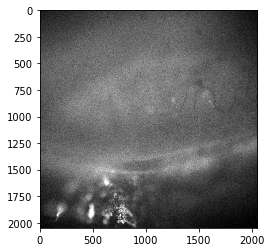

In [3]:
for pq in range(165, 245):
    img = cv2.imread('C:\Jupyter_project\B1__tif00{0}.tiff'.format(pq), cv2.IMREAD_GRAYSCALE)
    background = background + img
    F = np.fft.fft2(img)
    G = F*BP
    bpf_img = np.real(np.fft.ifft2(G))
    
    plt.imshow(img, cmap = "gray")
    

    bpf_av = sci.convolve(bpf_img, av_flt, mode='reflect')
    flt_img = sci.convolve(bpf_av, la_flt, mode='reflect')


    g2 = np.zeros((M,N))
    for i in range(1+r,M-r):
        for j in range(1+r,N-r):
            if flt_img[i,j] > thr_h:
                g2[i,j]=1
            elif flt_img[i,j]<thr_l:
                g2[i,j]=1

    min_v = np.min(bpf_img)
    max_v = np.max(bpf_img)
    bpf_img=(bpf_img-min_v)/(max_v-min_v)
    background_bpf += bpf_img
    blur = np.zeros((M,N))
    blur = cv2.GaussianBlur(g2,(149,149),10)
    focus_mask = blur*(np.pi*2*(10**2))
    focus_img = img*focus_mask
    focus_img_bpf = focus_mask*bpf_img

    add_img += focus_img
    add_img_bpf += focus_img_bpf
    num_focus_mask += focus_mask


In [20]:
background=background/81
background_bpf=background_bpf/81

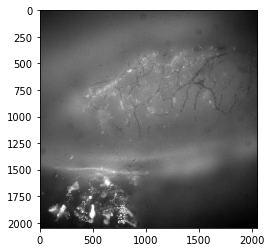

In [33]:
k=25
final_img_bpf = (add_img_bpf+(k*background_bpf))/(num_focus_mask+k)
final_img=(add_img+(k*background))/(num_focus_mask+k)
plt.imshow(final_img, cmap = "gray")
plt.show()

In [34]:
print(img.dtype)
print(bpf_img.dtype)
print(focus_mask.dtype)
print(background.dtype)
print(final_img.dtype)

uint8
float64
float64
float64
float64


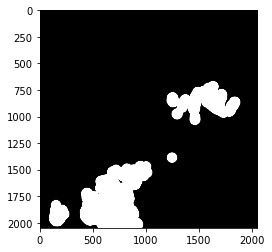

In [6]:
plt.imshow(blur2, cmap = "gray", vmax=0.00001)
plt.show()

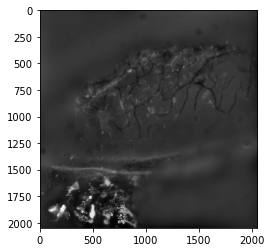

In [7]:
plt.imshow(final_img_bpf, cmap = "gray")
plt.show()

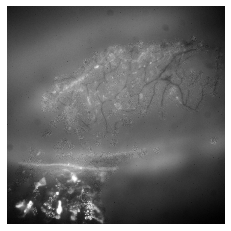

In [8]:
plt.imshow(final_img, cmap = "gray")
plt.axis('off')
plt.show()

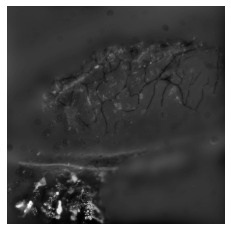

In [9]:
plt.imshow(final_img_bpf, cmap = "gray")
plt.axis('off')
plt.show()

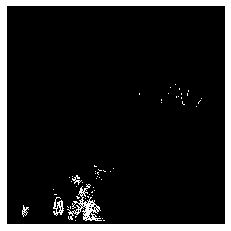

In [10]:
plt.imshow(g2, cmap = "gray")
plt.axis('off')
plt.show()

In [11]:
import tensorflow as tf

In [12]:
a=tf.Variable(tf.random_normal[(10)]

SyntaxError: unexpected EOF while parsing (<ipython-input-12-2041e86ef1d6>, line 1)